L’objectif est ici d'etudier un cas préesentant un problème de prédiction que ce soit dans le cadre de
la régression ou de la catégorisation. Vous devrez pour cela implémenter le code permettant de mettre
en oeuvre les points suivants :

— La lecture des données (que vous fournirez avec votre dossier en format .csv ou .xls ou .RData).
— Le pré-traitement des données si nécessaire.

— La validation croisée permettant d’évaluer les performances des méthodes suivantes :
— Modèle linéaire pénalisé par une fonction de régularisation elasticnet.
— Réseau de neuronnes avec une couche cachée.
— SVM.

— Autre m´ethode de votre choix sortant des techniques vues en cours (optionel).
Pour chaque type de méthode, vous testerez plusieurs ensembles de paramètres.


— Des graphiques permettant de comparer les résultats de chaque méthode avec les différents paramètres utilisés.
— Des graphiques permettant de comparer les meilleurs modèles des trois types de méthodes.

## Lecture des données

Notre jeu de données porte sur les haricots secs. 

Il comporte 13 611 observations (grains) pour 7 espèces différentes sur lesquelles nous souhaitons faire de la classification.

Les données ont été obtenues après des étapes de segmentation et d'extraction de caractéristiques sur des images prises par un système de vision par ordinateur utilisant une caméra haute résolution.

Les variables explicatives sont au nombre de 16 et sont relatives aux caractéristiques des grains : 

1.) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.

2.) Perimeter (P): La circonférence d'un haricot est définie comme la longueur de sa bordure.

3.) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.

4.) Minor axis length (l): La plus longue ligne que l'on peut tracer à partir d'un haricot en étant perpendiculaire à l'axe principal.

5.) Aspect ratio (K): Définit la relation entre L et l.

6.) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.

7.) Convex area (C): Nombre de pixels dans le plus petit polygone convexe qui peut contenir la surface d'une graine de haricot.

8.) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface que celle d'une graine de haricot.

9.) Extent (Ex): Le rapport entre les pixels de la boîte englobante et la surface du haricot.

10.) Solidity (S): Le rapport entre les pixels de la coquille convexe et ceux que l'on trouve dans les haricots.

11.) Roundness (R): Calculée à l'aide de la formule suivante : (4piA)/(P^2)

12.)Compactness (CO): Mesure la rondeur d'un objet : Ed/L

13.)ShapeFactor1 (SF1) = L/A

14.)ShapeFactor2 (SF2) = l/A

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [19]:
library(caret)
library(xlsx)
library(ggplot2)
library(lessR)
library(Hmisc)
library(dplyr)


Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster




In [3]:
data = read.xlsx('Dry_Bean_Dataset.xlsx',sheetIndex = 1,stringsAsFactors=TRUE)

In [4]:
head(data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
2,28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
3,29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
4,30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
5,30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
6,30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


In [5]:
dim(data)

[1] 13611    17

In [6]:
summary(data)

      Area          Perimeter      MajorAxisLength MinorAxisLength
 Min.   : 20420   Min.   : 524.7   Min.   :183.6   Min.   :122.5  
 1st Qu.: 36328   1st Qu.: 703.5   1st Qu.:253.3   1st Qu.:175.8  
 Median : 44652   Median : 794.9   Median :296.9   Median :192.4  
 Mean   : 53048   Mean   : 855.3   Mean   :320.1   Mean   :202.3  
 3rd Qu.: 61332   3rd Qu.: 977.2   3rd Qu.:376.5   3rd Qu.:217.0  
 Max.   :254616   Max.   :1985.4   Max.   :738.9   Max.   :460.2  
                                                                  
  AspectRation    Eccentricity      ConvexArea     EquivDiameter  
 Min.   :1.025   Min.   :0.2190   Min.   : 20684   Min.   :161.2  
 1st Qu.:1.432   1st Qu.:0.7159   1st Qu.: 36715   1st Qu.:215.1  
 Median :1.551   Median :0.7644   Median : 45178   Median :238.4  
 Mean   :1.583   Mean   :0.7509   Mean   : 53768   Mean   :253.1  
 3rd Qu.:1.707   3rd Qu.:0.8105   3rd Qu.: 62294   3rd Qu.:279.4  
 Max.   :2.430   Max.   :0.9114   Max.   :263261   Max.   :569

In [7]:
# test si présence de valeurs manquantes
sum(!complete.cases(data))

[1] 0

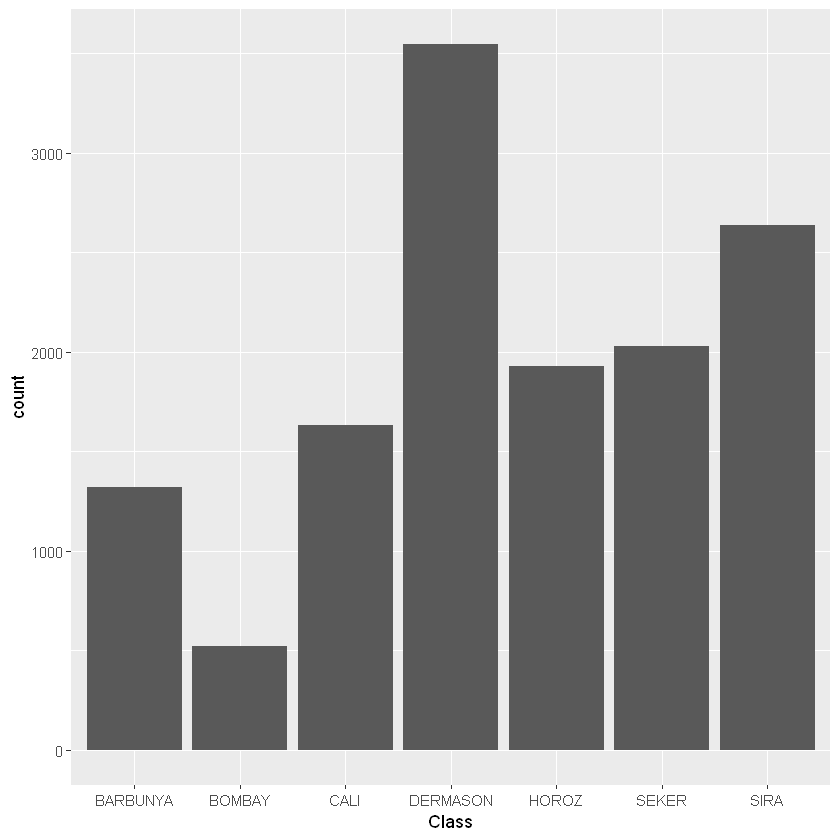

In [8]:
ggplot(data = data, aes(x = Class)) +
    geom_bar()

In [9]:
X = data[,c(1:16)]
y = data[,17]

In [10]:
PieChart(Class, hole = 0, values = "%", data = data, main = "")

>>> Suggestions
PieChart(Class, hole=0)  # traditional pie chart
PieChart(Class, values="%")  # display %'s on the chart
BarChart(Class)  # bar chart
Plot(Class)  # bubble plot
Plot(Class, values="count")  # lollipop plot 

--- Class --- 

   Class   Count   Prop 
------------------------ 
BARBUNYA    1322   0.097 
  BOMBAY     522   0.038 
    CALI    1630   0.120 
DERMASON    3546   0.261 
   HOROZ    1928   0.142 
   SEKER    2027   0.149 
    SIRA    2636   0.194 
------------------------ 
   Total   13611   1.000 

Chi-squared test of null hypothesis of equal probabilities 
  Chisq = 2859.439, df = 6, p-value = 0.000 




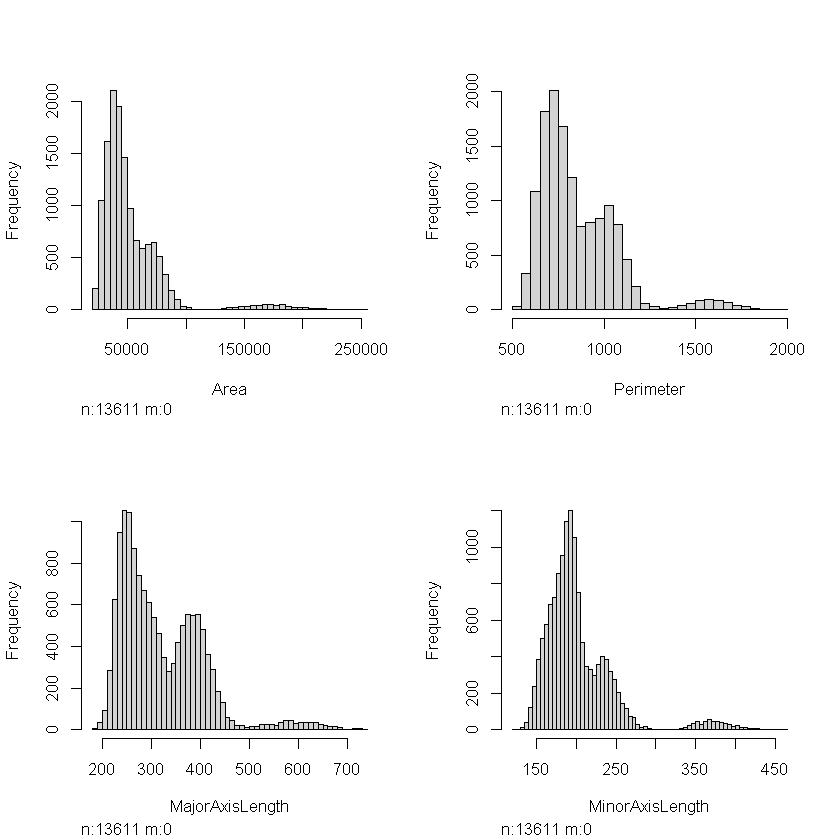

In [11]:
hist.data.frame(X[,c(1:4)])

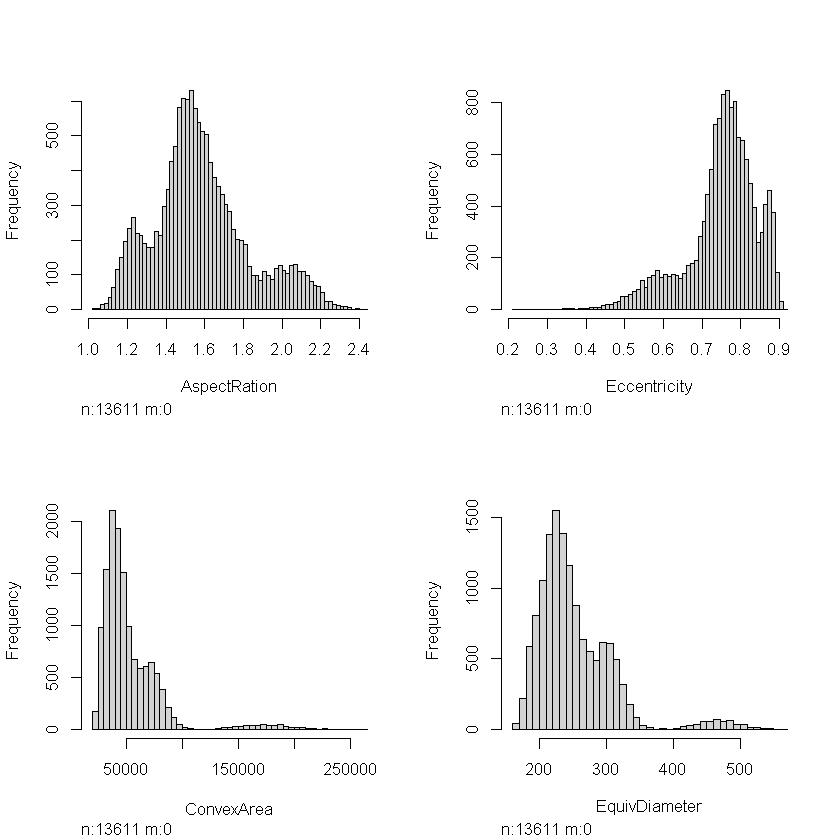

In [12]:
hist.data.frame(X[,c(5:8)])

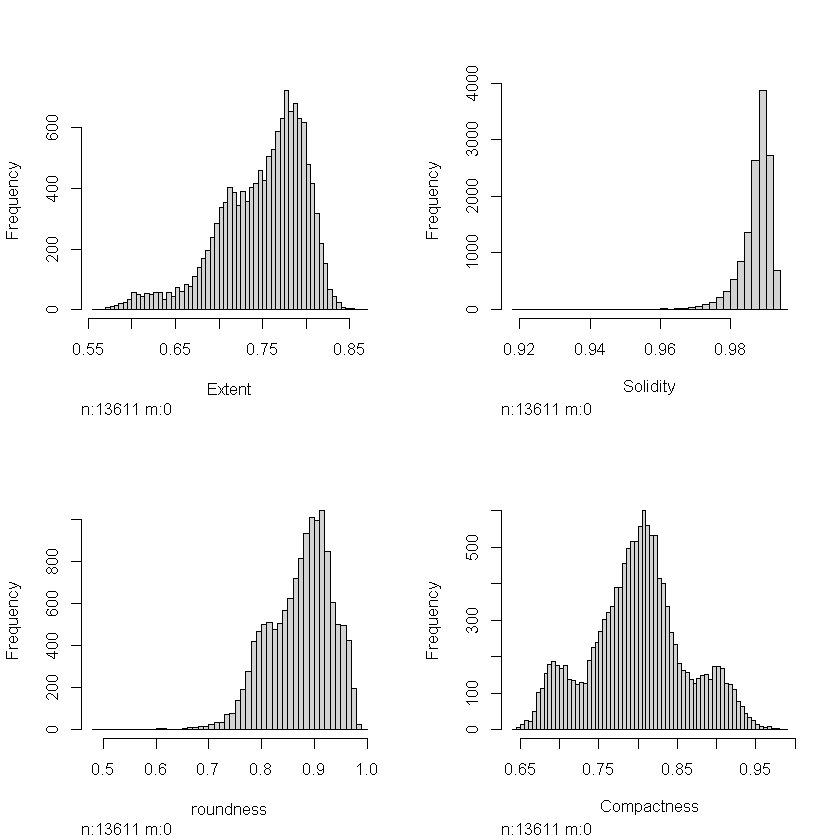

In [13]:
hist.data.frame(X[,c(9:12)])

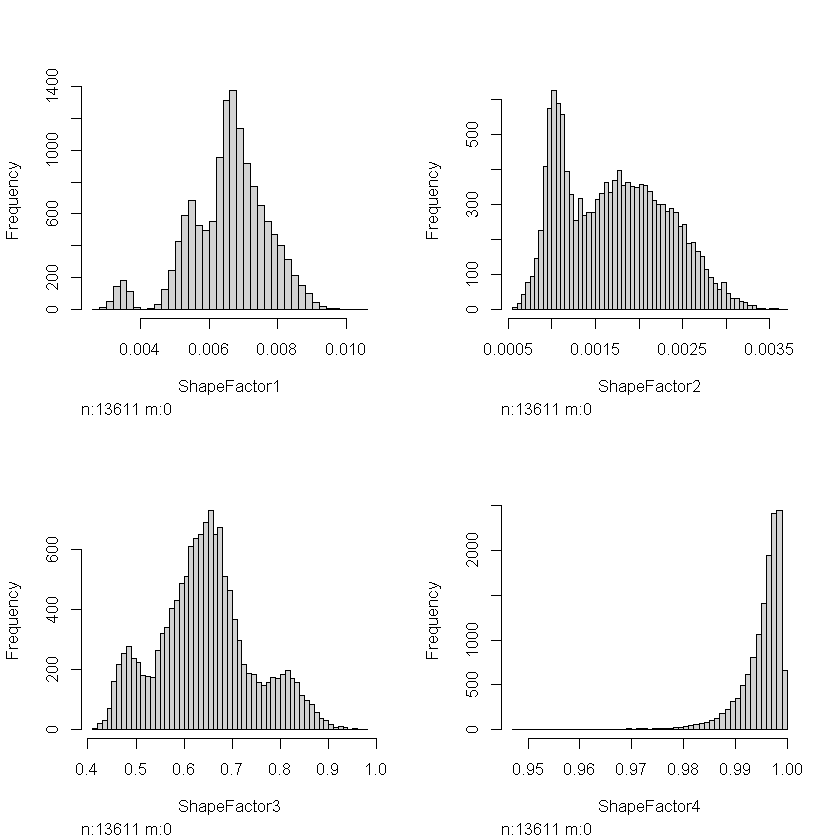

In [14]:
hist.data.frame(X[,c(13:16)])

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



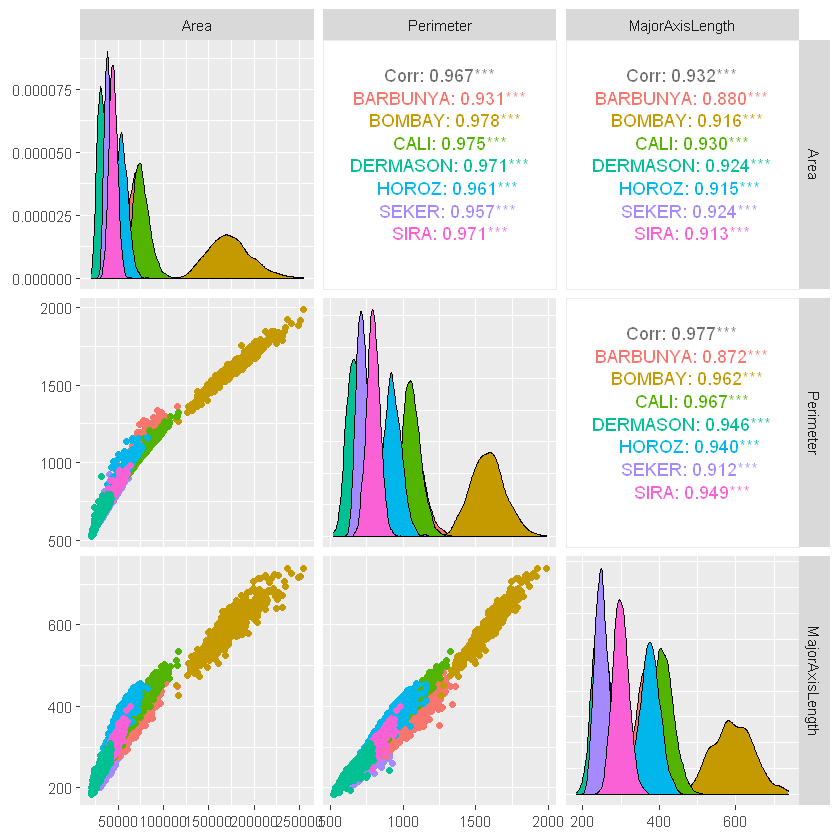

In [15]:
library(GGally)
 
ggpairs(data, columns = 1:3, ggplot2::aes(colour=Class)) 

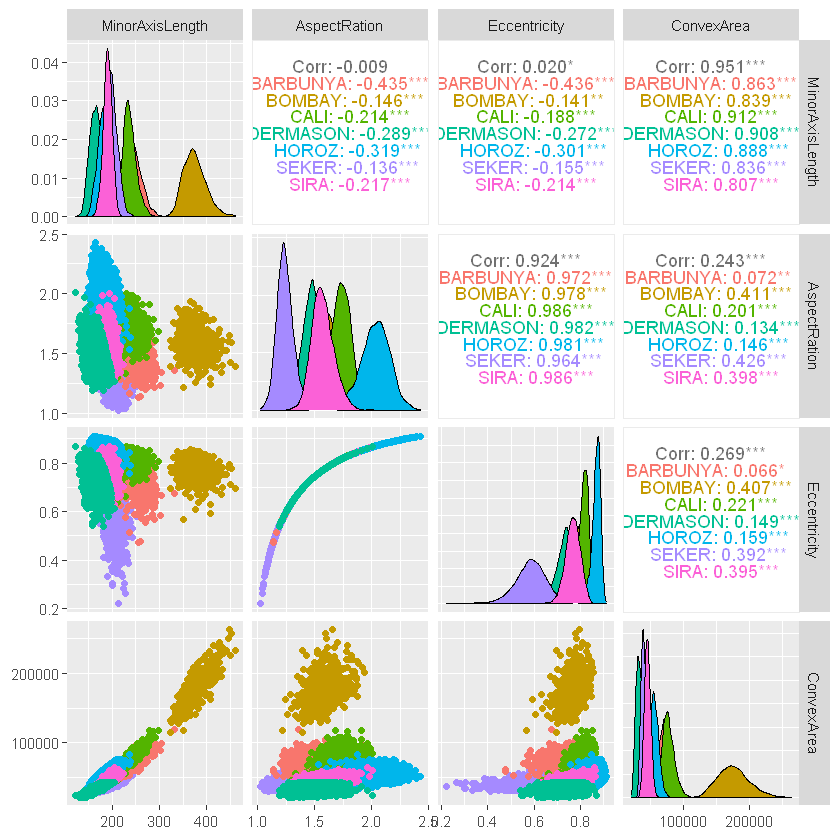

In [16]:
ggpairs(data, columns = 4:7, ggplot2::aes(colour=Class))

In [50]:
trainIndex <- createDataPartition(data$Class,p=0.7,list=F)

Train<- data[trainIndex,]
Test <- data[-trainIndex,]

XTrain <- Train[,c(1:16)]
yTrain <- Train[,"Class"] 

XTest <- Test[,c(1:16)]
yTest <- Test[,"Class"] 


preprocessParams <- preProcess(Train[,c(1:16)], method=c("center","scale"))
XTrain_scaled <- predict(preprocessParams,Train[,c(1:16)])
XTest_scaled <- predict(preprocessParams,Test[,c(1:16)])

In [21]:
# Distribution des classes dans les données de Train 
print(table(yTrain))

yTrain
BARBUNYA   BOMBAY     CALI DERMASON    HOROZ    SEKER     SIRA 
     926      366     1141     2483     1350     1419     1846 


In [22]:
# Distribution des classes dans les données de test 
print(table(yTest))

yTest
BARBUNYA   BOMBAY     CALI DERMASON    HOROZ    SEKER     SIRA 
     396      156      489     1063      578      608      790 


## Modèle linéaire pénalisé par une fonction de régularisation elasticnet.

In [23]:
train_control <- trainControl(
  method="cv",
  number=5,
  summaryFunction = multiClassSummary,
  classProbs = TRUE,
)

grid <- expand.grid(
  alpha = seq(0,1,by=0.1),
  lambda = seq(0.001,1,length=20)
)

In [24]:
set.seed(42)

model <- train(Class~.,
               data=Train, 
               method="glmnet",
               family = "multinomial",
               preProcess = c("center", "scale"), 
               tuneGrid = grid,
               metric = "Accuracy",
               trControl = train_control)

In [25]:
print(model)

glmnet 

9531 samples
  16 predictor
   7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

Pre-processing: centered (16), scaled (16) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7625, 7625, 7625, 7625, 7624 
Resampling results across tuning parameters:

  alpha  lambda  logLoss    AUC        prAUC      Accuracy   Kappa      
  0.0    0.1     0.6193735  0.9915615  0.9572566  0.8969681  0.874841656
  0.0    0.2     0.7780111  0.9890876  0.9423500  0.8624488  0.832187676
  0.0    0.3     0.8836668  0.9863781  0.9233467  0.8256206  0.786522720
  0.0    0.4     0.9631868  0.9835753  0.9011538  0.7871153  0.738471500
  0.0    0.5     1.0267566  0.9809049  0.8808592  0.7469305  0.687931866
  0.0    0.6     1.0793881  0.9785346  0.8641587  0.7136708  0.645768750
  0.0    0.7     1.1239165  0.9764620  0.8505093  0.6789421  0.601441077
  0.0    0.8     1.1626494  0.9746434  0.8382058  0.6462065  0.559250719
  0.0    0.9     1.1964902  0.9730265  0

In [26]:
model$bestTune$lambda

[1] 0.1

In [27]:
model$bestTune$alpha

[1] 0

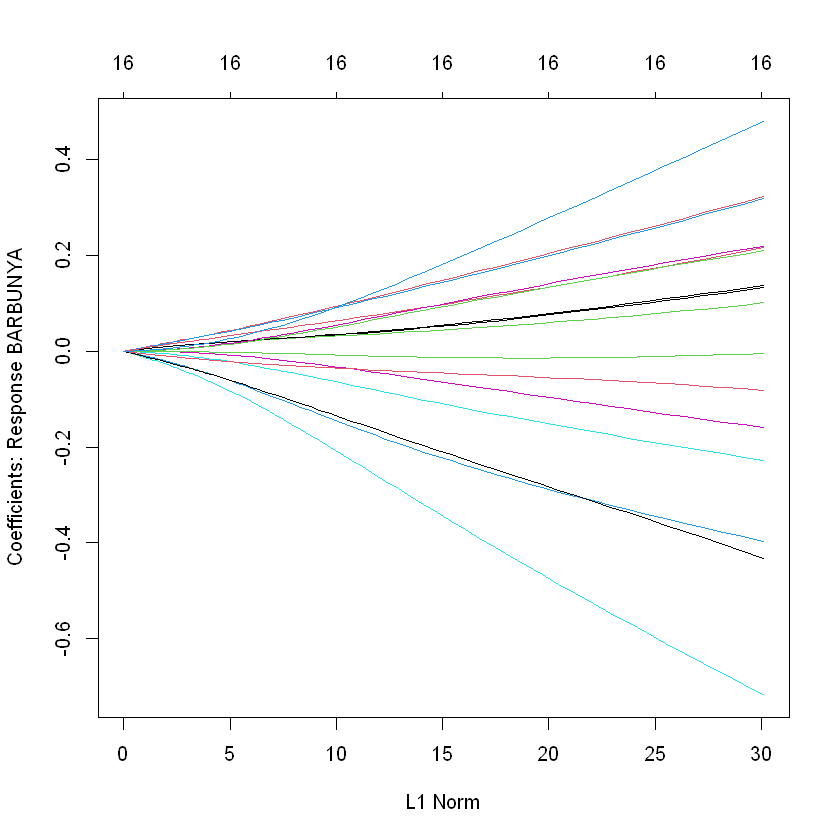

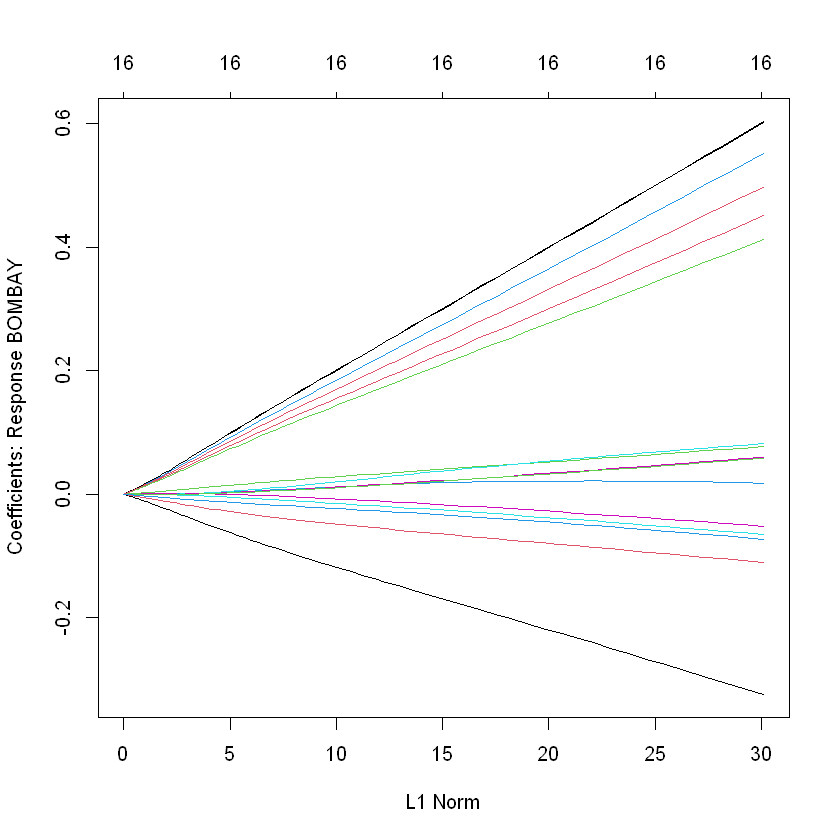

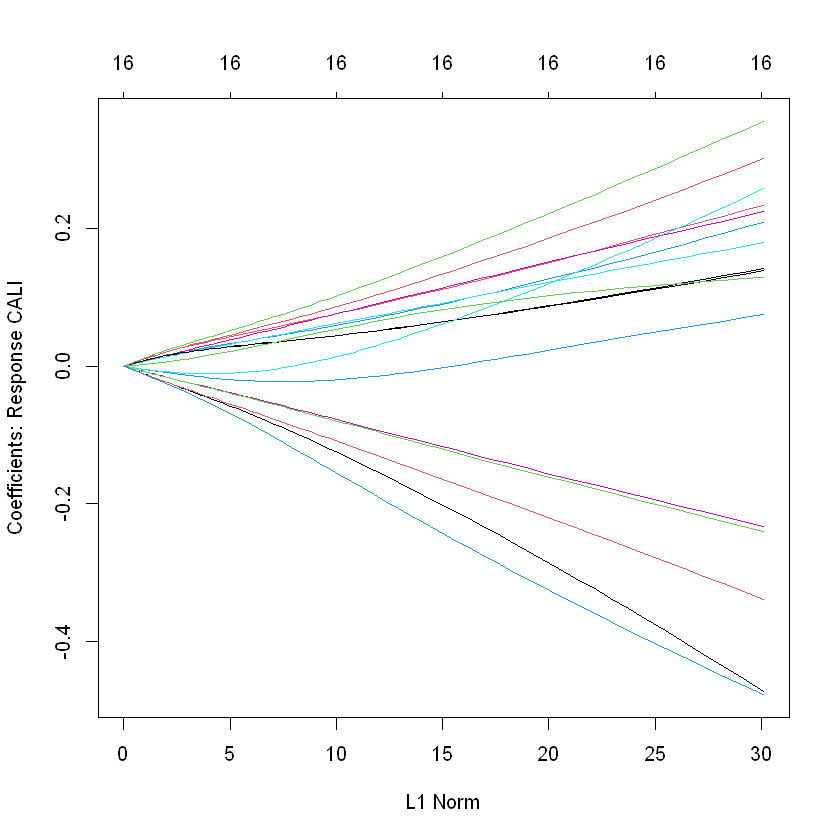

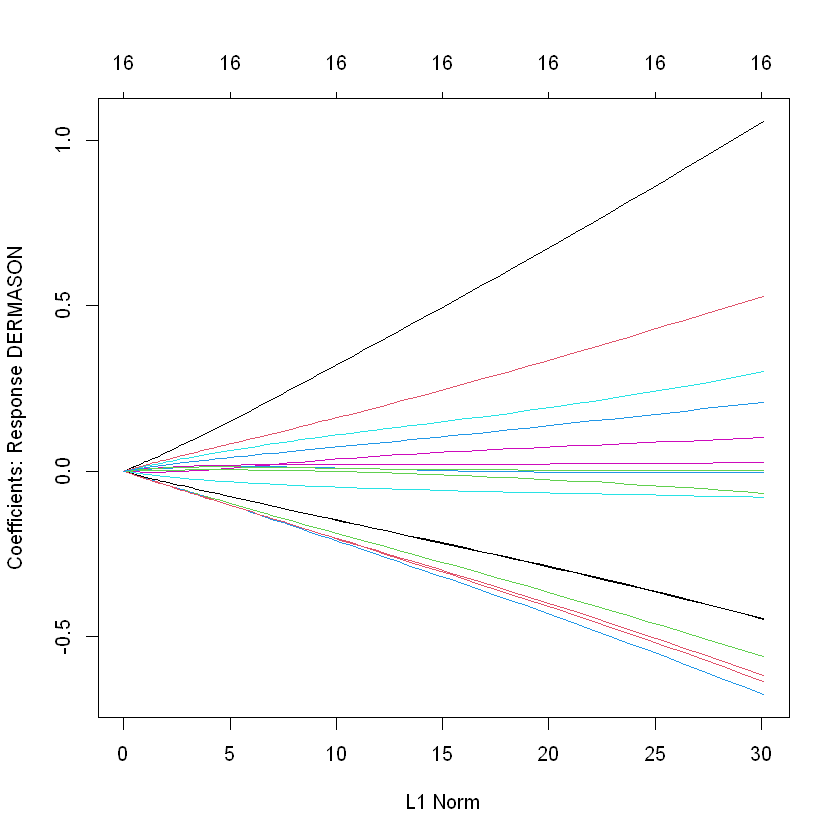

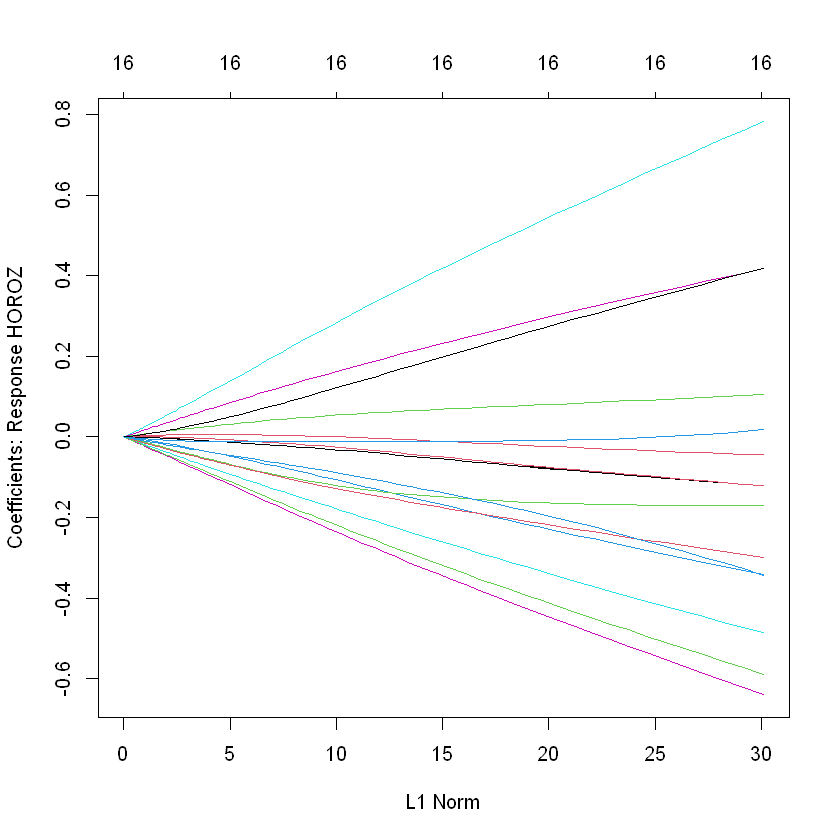

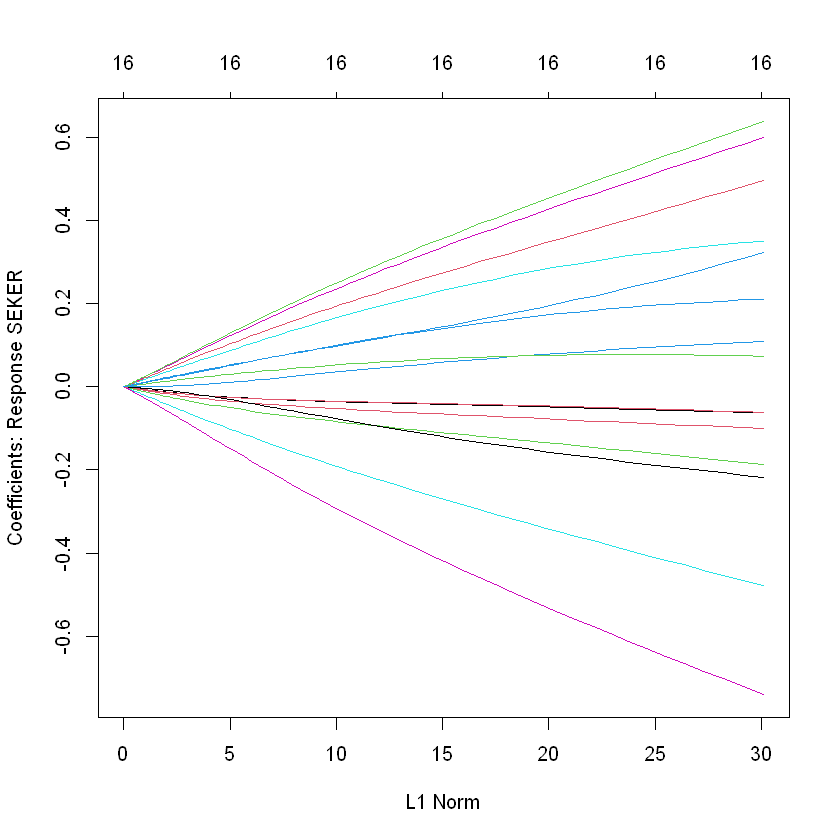

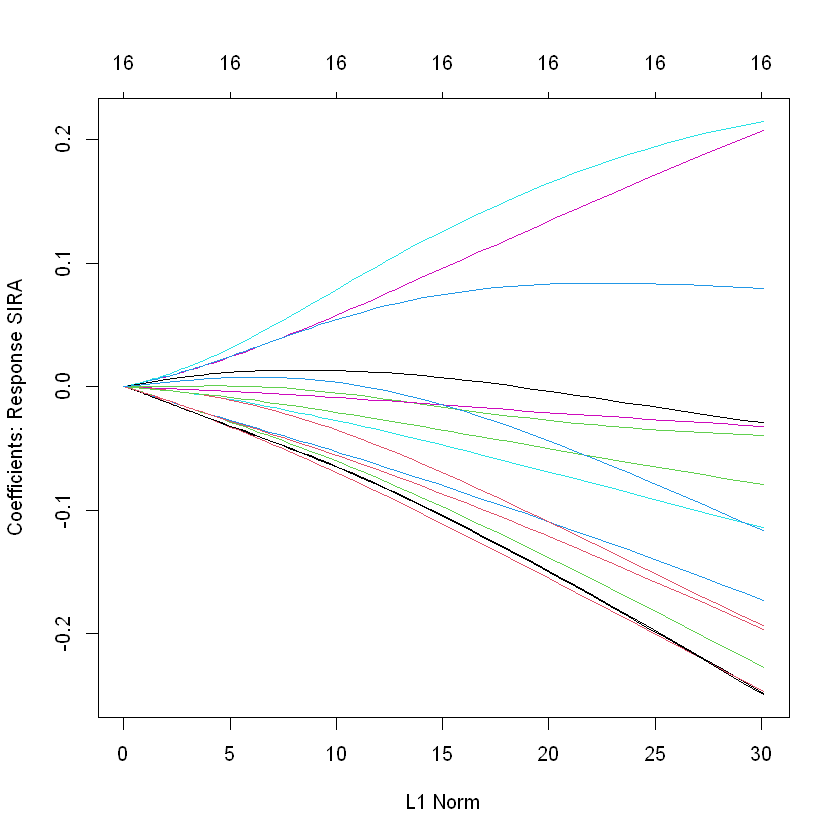

In [28]:
plot(model$finalModel)

In [29]:
predicted.class <- predict(model,newdata = XTest)

In [30]:
mean(predicted.class == Test$Class)

[1] 0.8928922

### Matrice de confusion

In [31]:
confusionMatrix(as.factor(predicted.class), Test$Class, positive = NULL, dnn = c("Prediction", "Reference"))

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      323      1    3        0     0     6    1
  BOMBAY          0    151    0        0     0     0    0
  CALI           23      4  448        0     7     0    0
  DERMASON        1      0    0     1031    10    22  176
  HOROZ           6      0   22        1   551     0   20
  SEKER          15      0    1       10     0   557   11
  SIRA           28      0   15       21    10    23  582

Overall Statistics
                                               
               Accuracy : 0.8929               
                 95% CI : (0.883, 0.9022)      
    No Information Rate : 0.2605               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.8698               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

        

## SVM

In [38]:
library(e1071)
library(caTools)
library(MLmetrics)

In [ ]:
## Ne pas exécuter
## Le meilleur modèle est C = 7 et kernel = radial

tuned = tune(svm,train.x=as.matrix(XTrain_scaled),
train.y=yTrain, data = data,
scale=F, type = "C-classification",
ranges = list(cost=seq(0.1, 10, 0.1),kernel= c("linear","radial","sigmoid","polynomial")),
tunecontrol=tune.control(cross=10))
tuned$performances

In [41]:
svm = svm(as.matrix(XTrain), yTrain, scale=T, type= "C-classification",kernel='radial',cost = 7)

In [44]:
pred = predict(svm, newdata = as.matrix(XTest))
#Matrice de confusion
cm = table(pred, yTest)
print(cm)
#Taux d'erreur
err = ((cm[1,2] + cm[2,1])/sum(cm))*100
print(err)
f1=F1_Score(yTest, pred, positive = NULL)
print(f1)



          yTest
pred       BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      366      0   14        0     0     3    0
  BOMBAY          0    156    0        0     0     0    0
  CALI           18      0  458        0     8     0    2
  DERMASON        0      0    0      985     7    14   84
  HOROZ           0      0   13        1   548     0    7
  SEKER           4      0    1       16     0   574    4
  SIRA            8      0    3       61    15    17  693
[1] 0
[1] 0.9396662


In [ ]:
pred=as.numeric(pred)
colAUC(pred, yTest, plotROC = TRUE)
abline(0,1, col = "blue")

In [ ]:
## Faire moyenne ? 

# Neurones : 
## Packages : 

In [45]:
library(neuralnet)
library(MLmetrics)
library(dplyr)
library(pROC)
library(caret)

In [54]:
y <- as.factor(make.names(Train$Class))

In [53]:
XTrain_scaled$y <- y
summary(XTrain_scaled)
str(XTrain_scaled)

      Area           Perimeter       MajorAxisLength   MinorAxisLength  
 Min.   :-1.1140   Min.   :-1.5429   Min.   :-1.5941   Min.   :-1.6184  
 1st Qu.:-0.5700   1st Qu.:-0.7089   1st Qu.:-0.7846   1st Qu.:-0.5877  
 Median :-0.2858   Median :-0.2831   Median :-0.2720   Median :-0.2178  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2813   3rd Qu.: 0.5625   3rd Qu.: 0.6582   3rd Qu.: 0.3230  
 Max.   : 6.8764   Max.   : 5.2761   Max.   : 4.8869   Max.   : 5.7363  
                                                                        
  AspectRation      Eccentricity       ConvexArea      EquivDiameter    
 Min.   :-2.2686   Min.   :-5.7736   Min.   :-1.1126   Min.   :-1.5526  
 1st Qu.:-0.6090   1st Qu.:-0.3747   1st Qu.:-0.5731   1st Qu.:-0.6413  
 Median :-0.1298   Median : 0.1473   Median :-0.2876   Median :-0.2463  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5065   3rd Qu.: 0.6485   3rd Qu.: 0.284

'data.frame':	9531 obs. of  17 variables:
 $ Area           : num  -0.842 -0.83 -0.782 -0.778 -0.771 ...
 $ Perimeter      : num  -1.144 -1.015 -1.098 -1.029 -0.865 ...
 $ MajorAxisLength: num  -1.31 -1.4 -1.38 -1.26 -1.27 ...
 $ MinorAxisLength: num  -0.633 -0.436 -0.268 -0.463 -0.407 ...
 $ AspectRation   : num  -1.57 -1.97 -2.12 -1.67 -1.77 ...
 $ Eccentricity   : num  -2.18 -3.68 -4.53 -2.5 -2.84 ...
 $ ConvexArea     : num  -0.843 -0.827 -0.785 -0.779 -0.767 ...
 $ EquivDiameter  : num  -1.064 -1.045 -0.967 -0.959 -0.949 ...
 $ Extent         : num  0.294 0.704 0.482 0.535 0.263 ...
 $ Solidity       : num  0.364 -0.464 0.8 0.504 -0.658 ...
 $ roundness      : num  1.427 0.23 1.88 1.188 -0.343 ...
 $ Compactness    : num  1.84 2.5 2.77 2.01 2.17 ...
 $ ShapeFactor1   : num  0.684 0.37 0.121 0.407 0.323 ...
 $ ShapeFactor2   : num  2.4 3.1 3.27 2.41 2.56 ...
 $ ShapeFactor3   : num  1.93 2.69 3.01 2.12 2.3 ...
 $ ShapeFactor4   : num  0.836 0.769 0.938 0.954 0.911 ...
 $ y         

In [ ]:
ctrl  <- trainControl(method  = "cv",number  = 5, 
                     summaryFunction = multiClassSummary, # Multiple metrics
                     classProbs=T,# Required for the ROC curves
                     savePredictions = T,
                     )

set.seed(150)

mygrid <- expand.grid(.decay = c(1, 0.5, 0.3, 0.1, 0.001), .size = c(10, 12, 14,16))
#decay is the regularization parameter to avoid over-fitting

fit.mlp <- train(y~.-y, data = XTrain_scaled, 
                 method = "nnet",
                 trControl = ctrl, 
                 act.fct= "logistic",
                 maxit = 250,    # Maximum number of iterations
                 tuneGrid = mygrid, #data.frame(size = 10, decay = 0),
                 metric = "Accuracy", linout = FALSE)



# weights:  247
initial  value 15661.757266 
iter  10 value 3941.005222
iter  20 value 2713.693927
iter  30 value 2577.857610
iter  40 value 2413.632015
iter  50 value 2256.543043
iter  60 value 2101.627458
iter  70 value 2013.396984
iter  80 value 1973.846125
iter  90 value 1947.964076
iter 100 value 1928.861118
iter 110 value 1911.118672
iter 120 value 1896.720414
iter 130 value 1888.449002
iter 140 value 1881.172743
iter 150 value 1875.443322
iter 160 value 1873.012841
iter 170 value 1872.000659
iter 180 value 1871.348283
iter 190 value 1870.232655
iter 200 value 1868.607408
iter 210 value 1867.171758
iter 220 value 1866.021063
iter 230 value 1865.635793
iter 240 value 1865.447134
iter 250 value 1865.370986
final  value 1865.370986 
stopped after 250 iterations
# weights:  247
initial  value 19539.911222 
iter  10 value 4694.489425
iter  20 value 2990.195806
iter  30 value 2632.531388
iter  40 value 2255.031339
iter  50 value 2096.721358
iter  60 value 1962.708229
iter  70 value 185

In [49]:
plot(fit.mlp)
fit.mlp$finalModel
plot(fit.mlp$finalModel)
fit.mlp$bestTune
fit.mlp$metric
fit.mlp$times
fit.mlp$modelInfo
fit.mlp

str(fit.mlp)

ERROR: Error in plot(fit.mlp): object 'fit.mlp' not found


In [ ]:
prob_cv <- predict(fit.mlp, newdata=XTest_scaled,type = "prob")

# Classes prédites : 
y_pred = prob_cv %>% mutate('class'=names(.)[apply(., 1, which.max)])
head(prob_cv)

#Matrice de confusion :
y_test= as.factor(unlist(yTest))
conf2 <- confusionMatrix(as.factor(y_pred$class), y_test)
conf2

#F1_score 
f1_score = conf2[["byClass"]][ , "F1"]
mean(f1_score)

# Accuracy
conf2$overall['Accuracy']


#AUC

rocurve = multiclass.roc(y_test , prob_cv, levels=levels(y_test))
rocurve

# AUC = 0.996